In [1]:
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability
import atlite
import rasterio as rio
from rasterio.plot import show
import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import country_converter as coco
import atlite

### prepare regions + cutout (weather data)

In [2]:
regions = gpd.read_file("gadm_410-levels-ADM_1-DEU.gpkg")
regions

,GID_0,GID_1,COUNTRY,NAME_1,geometry
0,DEU,DEU.1_1,Germany,Baden-Württemberg,"MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5..."
1,DEU,DEU.2_1,Germany,Bayern,"MULTIPOLYGON (((11.41009 47.49540, 11.41005 47..."
2,DEU,DEU.3_1,Germany,Berlin,"MULTIPOLYGON (((13.50022 52.61379, 13.49855 52..."
3,DEU,DEU.4_1,Germany,Brandenburg,"MULTIPOLYGON (((13.32220 51.43674, 13.32402 51..."
4,DEU,DEU.5_1,Germany,Bremen,"MULTIPOLYGON (((8.67501 53.17805, 8.67532 53.1..."
5,DEU,DEU.6_1,Germany,Hamburg,"MULTIPOLYGON (((10.17575 53.71111, 10.17562 53..."
6,DEU,DEU.7_1,Germany,Hessen,"MULTIPOLYGON (((8.88614 49.41698, 8.88546 49.4..."
7,DEU,DEU.8_1,Germany,Mecklenburg-Vorpommern,"MULTIPOLYGON (((11.56936 53.16780, 11.56944 53..."
8,DEU,DEU.9_1,Germany,Niedersachsen,"MULTIPOLYGON (((10.36772 51.55516, 10.36846 51..."
9,DEU,DEU.10_1,Germany,Nordrhein-Westfalen,"MULTIPOLYGON (((6.57956 50.37709, 6.57518 50.3..."


<AxesSubplot:>

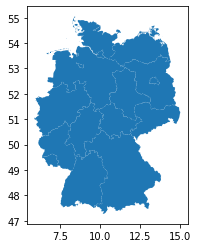

In [3]:
regions.plot()

<AxesSubplot:>

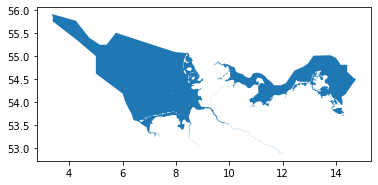

In [4]:
eez = gpd.read_file("eez_v11.gpkg") 
eez.loc[eez["SOVEREIGN1"]=="Germany"].plot()

<AxesSubplot:>

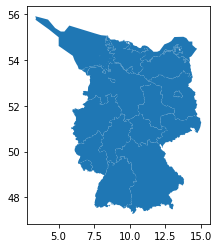

In [5]:
including_eez = pd.concat([regions.geometry,eez.loc[eez["SOVEREIGN1"]=="Germany"].geometry,eez.loc[eez["TERRITORY2"]=="Germany"].geometry, eez.loc[eez["TERRITORY2"]=="Germany"].geometry])
gpd.GeoDataFrame(including_eez).plot()

In [6]:
minx, miny, maxx, maxy = regions.total_bounds
buffer = 0.25

cutout = atlite.Cutout(
   path="germany2020.nc",
   module="era5",
   x=slice(minx-buffer, maxx+buffer),
   y=slice(miny-buffer, maxy+buffer),
   time="2020",
)

C:\Users\bilwi\anaconda3\lib\site-packages\atlite\cutout.py:187: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


In [7]:
# Don't run this the data is already prepared in germany.nc
# cutout.prepare() 

In [8]:
cutout.data

<xarray.Dataset>
Dimensions:           (x: 39, y: 33, time: 8784)
Coordinates:
  * x                 (x) float64 5.75 6.0 6.25 6.5 ... 14.5 14.75 15.0 15.25
  * y                 (y) float64 47.25 47.5 47.75 48.0 ... 54.75 55.0 55.25
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-12-31T23:00:00
    lon               (x) float64 dask.array<chunksize=(39,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(33,), meta=np.ndarray>
Data variables: (12/13)
    height            (y, x) float32 dask.array<chunksize=(33, 39), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 33, 39), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 33, 39), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 33, 39), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 33, 39), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(100, 33, 39), meta=np.ndarray>
    ...                ...
    albedo            (time, y, x) float32 dask.array<chunksize=(100, 33, 39), meta=np.ndarray>
    solar_altitude    (time, y, x) float64 dask.array<chunksize=(100, 33, 39), meta=np.ndarray>
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(100, 33, 39), meta=np.ndarray>
    temperature       (time, y, x) float32 dask.array<chunksize=(100, 33, 39), meta=np.ndarray>
    soil temperature  (time, y, x) float32 dask.array<chunksize=(100, 33, 39), meta=np.ndarray>
    runoff            (time, y, x) float32 dask.array<chunksize=(100, 33, 39), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['wind', 'temperature', 'influx', 'runoff', 'height']
    chunksize_time:     100
    Conventions:        CF-1.6
    history:            2023-02-01 18:21:09 GMT by grib_to_netcdf-2.25.1: /op...

In [9]:
cutout.prepared_features

module  feature    
era5    height                   height
        wind                    wnd100m
        wind                wnd_azimuth
        wind                  roughness
        influx               influx_toa
        influx            influx_direct
        influx           influx_diffuse
        influx                   albedo
        influx           solar_altitude
        influx            solar_azimuth
        temperature         temperature
        temperature    soil temperature
        runoff                   runoff
dtype: object

In [10]:
cutout

<Cutout "germany2020">
 x = 5.75 ⟷ 15.25, dx = 0.25
 y = 47.25 ⟷ 55.25, dy = 0.25
 time = 2020-01-01 ⟷ 2020-12-31, dt = H
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

In [11]:
def plot_area(masked, transform, shape):
    fig, ax = plt.subplots(figsize=(5,5))
    ax = show(masked, transform=transform, cmap='Greens', vmin=0, ax=ax)
    shape.plot(ax=ax, edgecolor='k', color='None', linewidth=1)

### Prepare onshore data

In [12]:
excluder = ExclusionContainer(crs=3035, res=300)

# roads and airports
excluder.add_geometry("ne_10m_roads.gpkg", buffer=300)
excluder.add_geometry("ne_10m_airports.gpkg", buffer=10000)

# natural protection areas
excluder.add_raster("WDPA_Oct2022_Public_shp-DEU.tif", crs=3035)

# maximum elevation of 2000m 
fn = 'GEBCO_2014_2D-DE.nc'
excluder.add_raster(fn, codes=lambda x: x>2000, crs=4326)

# distance to built up areas
fn = "PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-DE.tif"
excluder.add_raster(fn, codes=[50], buffer=1000, crs=4326)

# choose suitable land cover classes # page 29: https://zenodo.org/record/4723921#.Y8RMRafMIvg
excluder.add_raster(fn, codes=[20,30,40,60,90,10], crs=4326, invert=True) # TODO

C:\Users\bilwi\anaconda3\lib\site-packages\atlite\gis.py:469: UserWarning: Output dtype of shape_availability changed from float to boolean.
  warn(


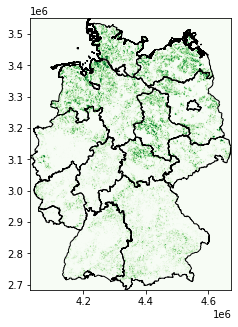

In [13]:
masked, transform = shape_availability(regions.to_crs(3035).geometry, excluder)
plot_area(masked, transform, regions.to_crs(3035).geometry)

In [14]:
regions.index = regions.GID_1

A = cutout.availabilitymatrix(regions, excluder)

cap_per_sqkm = 3 # MW/km2

area = cutout.grid.set_index(['y', 'x']).to_crs(3035).area / 1e6
area = xr.DataArray(area, dims=('spatial'))

capacity_matrix = A.stack(spatial=['y', 'x']) * area * cap_per_sqkm
#capacity_matrix

Compute availability matrix: 100%|█████████████████████████████████████████████| 16/16 [03:41<00:00, 13.86s/ gridcells]


In [15]:
wind = cutout.wind(
    atlite.windturbines.Vestas_V112_3MW,
    matrix=capacity_matrix,
    index=regions.index,
    per_unit=True, # TODO 
)

In [16]:
wind_pd = wind.to_pandas()

resolution = 3
wind_pd = wind_pd.resample(f"{resolution}H").first()
wind_pd = wind_pd.T
#wind_pd

In [17]:
group_regions = regions.copy().drop(["GID_0","GID_1","NAME_1","COUNTRY"],axis=1)
group_regions["group"] = [1,1,0,0,4,4,3,0,4,2,2,2,0,0,4,3]

group_regions = group_regions.join(wind_pd,on = "GID_1")
group_regions= group_regions.dissolve(by = "group",aggfunc='mean')
group_regions 

,geometry,2020-01-01 00:00:00,2020-01-01 03:00:00,2020-01-01 06:00:00,2020-01-01 09:00:00,2020-01-01 12:00:00,2020-01-01 15:00:00,2020-01-01 18:00:00,2020-01-01 21:00:00,2020-01-02 00:00:00,...,2020-12-30 18:00:00,2020-12-30 21:00:00,2020-12-31 00:00:00,2020-12-31 03:00:00,2020-12-31 06:00:00,2020-12-31 09:00:00,2020-12-31 12:00:00,2020-12-31 15:00:00,2020-12-31 18:00:00,2020-12-31 21:00:00
group,,,,,,,,,,,,,,,,,,,,,
0,"MULTIPOLYGON (((11.44661 51.19888, 11.44673 51...",0.196076,0.142893,0.154272,0.113740,0.069080,0.132807,0.205645,0.237016,0.167651,...,0.351301,0.347089,0.334311,0.287933,0.214439,0.234998,0.111816,0.139639,0.202418,0.165486
1,"MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5...",0.011660,0.021713,0.037891,0.030401,0.005336,0.024077,0.053897,0.049432,0.055321,...,0.162228,0.124000,0.113858,0.111024,0.106686,0.103439,0.077470,0.092342,0.101241,0.099080
2,"POLYGON ((7.19729 49.11891, 7.19703 49.11971, ...",0.096736,0.081769,0.064174,0.067466,0.011101,0.033569,0.073748,0.090844,0.058143,...,0.246399,0.241655,0.249428,0.342831,0.316523,0.328770,0.158493,0.079515,0.071329,0.065366
3,"MULTIPOLYGON (((8.68587 49.62167, 8.68588 49.6...",0.017642,0.018676,0.025700,0.034075,0.014780,0.045998,0.095904,0.151955,0.098490,...,0.232834,0.218897,0.212441,0.242742,0.252046,0.252852,0.118464,0.116654,0.091405,0.051372
4,"MULTIPOLYGON (((9.69114 53.56147, 9.69153 53.5...",0.068312,0.128246,0.112388,0.099929,0.054053,0.118798,0.219231,0.277908,0.174190,...,0.452832,0.526501,0.516037,0.498071,0.357548,0.312239,0.255209,0.140425,0.182553,0.164303


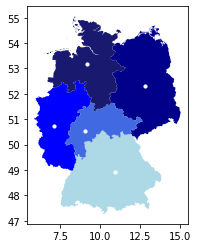

In [18]:
points = group_regions.representative_point()
fig, ax = plt.subplots()
group_regions.plot(color = ["darkblue","lightblue","blue","royalblue","midnightblue"] ,ax=ax)
points.plot(ax=ax, color='white', markersize=10);

In [19]:
on_wind_timeseries = group_regions.T.iloc[1:].copy()
on_wind_timeseries.index = pd.to_datetime(on_wind_timeseries.index)
on_wind_timeseries

group,0,1,2,3,4
2020-01-01 00:00:00,0.196076,0.01166,0.096736,0.017642,0.068312
2020-01-01 03:00:00,0.142893,0.021713,0.081769,0.018676,0.128246
2020-01-01 06:00:00,0.154272,0.037891,0.064174,0.0257,0.112388
2020-01-01 09:00:00,0.11374,0.030401,0.067466,0.034075,0.099929
2020-01-01 12:00:00,0.06908,0.005336,0.011101,0.01478,0.054053
...,...,...,...,...,...
2020-12-31 09:00:00,0.234998,0.103439,0.32877,0.252852,0.312239
2020-12-31 12:00:00,0.111816,0.07747,0.158493,0.118464,0.255209
2020-12-31 15:00:00,0.139639,0.092342,0.079515,0.116654,0.140425
2020-12-31 18:00:00,0.202418,0.101241,0.071329,0.091405,0.182553


### Prepare solar data

C:\Users\bilwi\anaconda3\lib\site-packages\atlite\gis.py:469: UserWarning: Output dtype of shape_availability changed from float to boolean.
  warn(


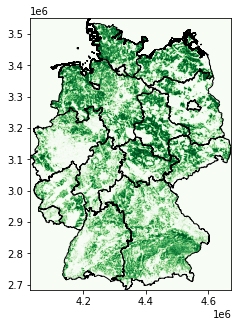

In [20]:
excluder = ExclusionContainer(crs=3035, res=300)

# choose suitable land cover classes # page 29: https://zenodo.org/record/4723921#.Y8RMRafMIvg
fn = "PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-DE.tif"
excluder.add_raster(fn, codes=[20,30,40,60, 90,10], crs=4326, invert=True)

# no natural protection areas
excluder.add_raster("WDPA_Oct2022_Public_shp-DEU.tif", crs=3035)

masked, transform = shape_availability(regions.to_crs(3035).geometry, excluder)
plot_area(masked, transform, regions.to_crs(3035).geometry)

In [21]:
regions.index = regions.GID_1
A = cutout.availabilitymatrix(regions, excluder)

cap_per_sqkm = 3 # MW/km2

area = cutout.grid.set_index(['y', 'x']).to_crs(3035).area / 1e6

area = xr.DataArray(area, dims=('spatial'))

capacity_matrix = A.stack(spatial=['y', 'x']) * area * cap_per_sqkm

Compute availability matrix: 100%|█████████████████████████████████████████████| 16/16 [00:20<00:00,  1.26s/ gridcells]


In [22]:
solar = cutout.pv(
    panel=atlite.solarpanels.CdTe,
    matrix=capacity_matrix,
    orientation='latitude_optimal',
    index=regions.index,
    per_unit=True, # TODO
)

[########################################] | 100% Completed |  4.2s


In [23]:
solar_pd = solar.to_pandas()

resolution = 3
solar_pd = solar_pd.resample(f"{resolution}H").first()
solar_pd = solar_pd.T
#solar_pd

In [24]:
group_regions = regions.copy().drop(["GID_0","GID_1","NAME_1","COUNTRY"],axis=1)

group_regions["group"] = [1,1,0,0,4,4,3,0,4,2,2,2,0,0,4,3]

group_regions = group_regions.join(solar_pd,on = "GID_1")

group_regions= group_regions.dissolve(by = "group",aggfunc='mean')
group_regions

,geometry,2020-01-01 00:00:00,2020-01-01 03:00:00,2020-01-01 06:00:00,2020-01-01 09:00:00,2020-01-01 12:00:00,2020-01-01 15:00:00,2020-01-01 18:00:00,2020-01-01 21:00:00,2020-01-02 00:00:00,...,2020-12-30 18:00:00,2020-12-30 21:00:00,2020-12-31 00:00:00,2020-12-31 03:00:00,2020-12-31 06:00:00,2020-12-31 09:00:00,2020-12-31 12:00:00,2020-12-31 15:00:00,2020-12-31 18:00:00,2020-12-31 21:00:00
group,,,,,,,,,,,,,,,,,,,,,
0,"MULTIPOLYGON (((11.44661 51.19888, 11.44673 51...",0.0,0.0,0.0,0.121336,0.305920,0.112085,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.127813,0.257823,0.026974,0.0,0.0
1,"MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5...",0.0,0.0,0.0,0.217450,0.517098,0.226642,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.152845,0.308842,0.101204,0.0,0.0
2,"POLYGON ((7.19729 49.11891, 7.19703 49.11971, ...",0.0,0.0,0.0,0.153992,0.509915,0.239071,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.026563,0.091329,0.034083,0.0,0.0
3,"MULTIPOLYGON (((8.68587 49.62167, 8.68588 49.6...",0.0,0.0,0.0,0.151287,0.453198,0.193483,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.053269,0.145034,0.035017,0.0,0.0
4,"MULTIPOLYGON (((9.69114 53.56147, 9.69153 53.5...",0.0,0.0,0.0,0.072019,0.238965,0.131106,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.021187,0.104405,0.033964,0.0,0.0


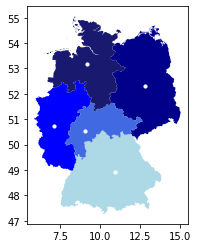

In [25]:
points = group_regions.representative_point()
fig, ax = plt.subplots()
group_regions.plot(color = ["darkblue","lightblue","blue","royalblue","midnightblue"] ,ax=ax)
points.plot(ax=ax, color='white', markersize=10);

In [26]:
solar_timeseries = group_regions.T.iloc[1:].copy()
solar_timeseries.index = pd.to_datetime(solar_timeseries.index)
solar_timeseries

group,0,1,2,3,4
2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-01 06:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-01 09:00:00,0.121336,0.21745,0.153992,0.151287,0.072019
2020-01-01 12:00:00,0.30592,0.517098,0.509915,0.453198,0.238965
...,...,...,...,...,...
2020-12-31 09:00:00,0.127813,0.152845,0.026563,0.053269,0.021187
2020-12-31 12:00:00,0.257823,0.308842,0.091329,0.145034,0.104405
2020-12-31 15:00:00,0.026974,0.101204,0.034083,0.035017,0.033964
2020-12-31 18:00:00,0.0,0.0,0.0,0.0,0.0


### Prepare offshore data

C:\Users\bilwi\anaconda3\lib\site-packages\atlite\gis.py:469: UserWarning: Output dtype of shape_availability changed from float to boolean.
  warn(


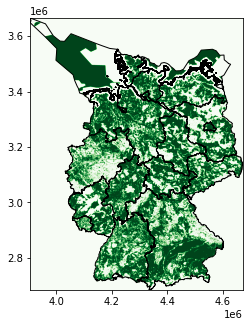

In [27]:
excluder = ExclusionContainer(crs=3035, res=300)

# TODO 10km minimum distance to shore
fn = "PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-DE.tif"
excluder.add_raster(fn, codes=[200], crs=4326, buffer=10000,invert = False) # this works and removes area on both sides of the shore for some reason but we can work with it because pypsa will place the offshore turbines offshore

## no natural protection areas
excluder.add_raster("WDPA_Oct2022_Public_shp-DEU.tif", crs=3035)

## exclude anything less than 50m depth
fn = 'GEBCO_2014_2D-DE.nc'
excluder.add_raster(fn, codes=lambda x: x<-50, crs=4326)

masked, transform = shape_availability(including_eez.to_crs(3035).geometry, excluder)
plot_area(masked, transform, including_eez.to_crs(3035).geometry)

In [28]:
region6 = gpd.GeoDataFrame( [["DEU","DEU.17_1","Germany","region6",including_eez.iloc[16]]], columns=list(regions.columns), index=["DEU.17_1" ])

In [29]:
regions2 = gpd.GeoDataFrame(pd.concat([regions,region6]))
regions2

C:\Users\bilwi\anaconda3\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


,GID_0,GID_1,COUNTRY,NAME_1,geometry
DEU.1_1,DEU,DEU.1_1,Germany,Baden-Württemberg,"MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5..."
DEU.2_1,DEU,DEU.2_1,Germany,Bayern,"MULTIPOLYGON (((11.41009 47.49540, 11.41005 47..."
DEU.3_1,DEU,DEU.3_1,Germany,Berlin,"MULTIPOLYGON (((13.50022 52.61379, 13.49855 52..."
DEU.4_1,DEU,DEU.4_1,Germany,Brandenburg,"MULTIPOLYGON (((13.32220 51.43674, 13.32402 51..."
DEU.5_1,DEU,DEU.5_1,Germany,Bremen,"MULTIPOLYGON (((8.67501 53.17805, 8.67532 53.1..."
DEU.6_1,DEU,DEU.6_1,Germany,Hamburg,"MULTIPOLYGON (((10.17575 53.71111, 10.17562 53..."
DEU.7_1,DEU,DEU.7_1,Germany,Hessen,"MULTIPOLYGON (((8.88614 49.41698, 8.88546 49.4..."
DEU.8_1,DEU,DEU.8_1,Germany,Mecklenburg-Vorpommern,"MULTIPOLYGON (((11.56936 53.16780, 11.56944 53..."
DEU.9_1,DEU,DEU.9_1,Germany,Niedersachsen,"MULTIPOLYGON (((10.36772 51.55516, 10.36846 51..."
DEU.10_1,DEU,DEU.10_1,Germany,Nordrhein-Westfalen,"MULTIPOLYGON (((6.57956 50.37709, 6.57518 50.3..."


In [30]:
regions2.index = regions2.GID_1
A = cutout.availabilitymatrix(regions2, excluder)

cap_per_sqkm = 3 # MW/km2

area = cutout.grid.set_index(['y', 'x']).to_crs(3035).area / 1e6

area = xr.DataArray(area, dims=('spatial'))

capacity_matrix = A.stack(spatial=['y', 'x']) * area * cap_per_sqkm

wind = cutout.wind(
    atlite.windturbines.NREL_ReferenceTurbine_5MW_offshore ,
    matrix=capacity_matrix,
    index=regions2.index,
    per_unit=True, # TODO 
)

Compute availability matrix: 100%|█████████████████████████████████████████████| 17/17 [00:22<00:00,  1.35s/ gridcells]


In [31]:
wind_pd = wind.to_pandas().T
wind_pd = wind_pd.T.resample(f"{3}H").first().T 
wind_pd

group_regions = regions2.copy().drop(["GID_0","GID_1","NAME_1","COUNTRY"],axis=1)
group_regions["group"] = [1,1,0,0,4,4,3,0,4,2,2,2,0,0,4,3,5]


group_regions = group_regions.join(wind_pd,on = "GID_1")
group_regions= group_regions.dissolve(by = "group",aggfunc='mean')
group_regions 

,geometry,2020-01-01 00:00:00,2020-01-01 03:00:00,2020-01-01 06:00:00,2020-01-01 09:00:00,2020-01-01 12:00:00,2020-01-01 15:00:00,2020-01-01 18:00:00,2020-01-01 21:00:00,2020-01-02 00:00:00,...,2020-12-30 18:00:00,2020-12-30 21:00:00,2020-12-31 00:00:00,2020-12-31 03:00:00,2020-12-31 06:00:00,2020-12-31 09:00:00,2020-12-31 12:00:00,2020-12-31 15:00:00,2020-12-31 18:00:00,2020-12-31 21:00:00
group,,,,,,,,,,,,,,,,,,,,,
0,"MULTIPOLYGON (((11.44661 51.19888, 11.44673 51...",0.165227,0.117268,0.126763,0.089425,0.050432,0.108073,0.174453,0.204720,0.140982,...,0.296476,0.293331,0.283133,0.245522,0.186034,0.206355,0.100151,0.124836,0.181021,0.151184
1,"MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5...",0.011704,0.019052,0.031714,0.025965,0.005353,0.021642,0.045417,0.041742,0.047410,...,0.137740,0.107922,0.100616,0.105072,0.101043,0.101640,0.071546,0.086739,0.096688,0.094269
2,"POLYGON ((7.19729 49.11891, 7.19703 49.11971, ...",0.102789,0.091771,0.078095,0.080948,0.016832,0.041639,0.074811,0.084671,0.057229,...,0.211638,0.207661,0.221634,0.289624,0.273683,0.287711,0.156354,0.081598,0.071137,0.065971
3,"MULTIPOLYGON (((8.68587 49.62167, 8.68588 49.6...",0.015709,0.016199,0.021181,0.026226,0.010091,0.035876,0.079632,0.129401,0.080940,...,0.200663,0.184964,0.177954,0.201842,0.213933,0.216697,0.107045,0.111726,0.093595,0.063133
4,"MULTIPOLYGON (((9.69114 53.56147, 9.69153 53.5...",0.065701,0.105170,0.091621,0.078590,0.042875,0.102996,0.189805,0.239952,0.155638,...,0.356103,0.401884,0.393796,0.384126,0.283750,0.234765,0.186767,0.100404,0.122432,0.120941
5,"MULTIPOLYGON (((14.09923 53.86999, 14.11579 53...",0.193882,0.370165,0.419808,0.480151,0.555649,0.551362,0.733169,0.712812,0.689214,...,0.671091,0.716042,0.711815,0.691597,0.540574,0.482174,0.488872,0.326112,0.216476,0.136041


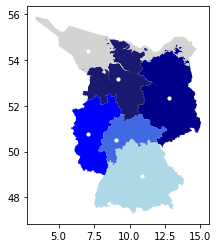

In [32]:
points = group_regions.representative_point()
fig, ax = plt.subplots()
group_regions.plot(color = ["darkblue","lightblue","blue","royalblue","midnightblue","lightgray"] ,ax=ax)
points.plot(ax=ax, color='white', markersize=10);

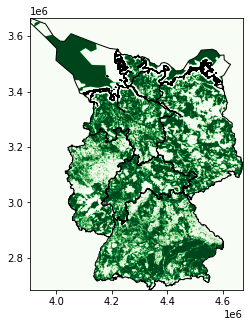

In [33]:
plot_area(masked, transform, group_regions.to_crs(3035).geometry)

In [34]:
off_shore_timeseries = group_regions.T.iloc[1:].copy()
off_shore_timeseries.index = pd.to_datetime(off_shore_timeseries.index)

In [35]:
off_shore_timeseries[[5]]

group,5
2020-01-01 00:00:00,0.193882
2020-01-01 03:00:00,0.370165
2020-01-01 06:00:00,0.419808
2020-01-01 09:00:00,0.480151
2020-01-01 12:00:00,0.555649
...,...
2020-12-31 09:00:00,0.482174
2020-12-31 12:00:00,0.488872
2020-12-31 15:00:00,0.326112
2020-12-31 18:00:00,0.216476


### prepare load data

In [36]:
load = pd.read_csv('load.csv',parse_dates = True, index_col="time")
load.index = load.index.map(lambda t: t.replace(year=2020))
load=load[["DE"]]
load

load['0'] = load['DE']*0.16866
load['1'] = load['DE']*0.291957
load['2'] = load['DE']*0.27648
load['3'] = load['DE']*0.100963
load['4'] = load['DE']*0.16194
load = load.resample(f"{3}H").first()
load

,DE,0,1,2,3,4
time,,,,,,
2020-01-01 00:00:00,63196.455337,10658.714157,18450.647511,17472.555972,6380.503720,10234.033977
2020-01-01 03:00:00,61639.372691,10396.096598,17996.046333,17042.053762,6223.295985,9981.880014
2020-01-01 06:00:00,81484.921042,13743.246783,23790.093093,22528.950970,8226.962083,13195.668114
2020-01-01 09:00:00,87167.594049,14701.686412,25449.189256,24100.096403,8800.701798,14115.920180
2020-01-01 12:00:00,86757.029224,14632.440549,25329.321981,23986.583440,8759.249941,14049.433312
...,...,...,...,...,...,...
2020-12-31 09:00:00,85663.431612,14447.994376,25010.038503,23684.225572,8648.837046,13872.336115
2020-12-31 12:00:00,83032.475282,14004.257281,24241.912386,22956.818766,8383.207802,13446.279047
2020-12-31 15:00:00,83374.851791,14062.002503,24341.871604,23051.479023,8417.775161,13501.723499


### prepare costs data 

In [37]:
#costs = pd.read_csv('costs_2020.csv', index_col=[0,1])
year = 2030
url = f"https://raw.githubusercontent.com/PyPSA/technology-data/master/outputs/costs_{year}.csv"
costs = pd.read_csv(url, index_col=[0,1])

costs.loc[costs.unit.str.contains("/kW"), "value"] *= 1e3
costs.unit = costs.unit.str.replace("/kW", "/MW")

defaults = {
    "FOM": 0,
    "VOM": 0,
    "efficiency": 1,
    "fuel": 0,
    "investment": 0,
    "lifetime": 25,
    "CO2 intensity": 0,
    "discount rate": 0.07,
}
costs = costs.value.unstack().fillna(defaults)
costs.at["gas", "efficiency"] =  costs.at["CCGT", "efficiency"]
costs.at["waste", "efficieny"] = costs.at["biomass", "efficiency"]
costs = costs.fillna(defaults)

def annuity(r, n):
    return r / (1.0 - 1.0 / (1.0 + r) ** n)

costs["marginal_cost"] = costs["VOM"] + costs["fuel"] / costs["efficiency"]
#costs.loc[list(costs["discount rate"]!=0.07)]["discount rate"]

#annuity = costs.apply(lambda x: annuity(x["discount rate"], x["lifetime"]), axis=1)
annuity = costs.apply(lambda x: annuity(0.07, x["lifetime"]), axis=1)

costs["capital_cost"] = (annuity + costs["FOM"] / 100) * costs["investment"]

costs


parameter,C in fuel,C stored,CO2 intensity,CO2 stored,FOM,VOM,c_b,c_v,capacity,capture rate,...,fuel,heat-input,heat-output,investment,lifetime,min_fill_level,p_nom_ratio,efficieny,marginal_cost,capital_cost
technology,,,,,,,,,,,,,,,,,,,,,
Ammonia cracker,NaN,NaN,0.0,NaN,4.30,0.00,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1062107.74,25.0,NaN,NaN,NaN,0.00,136810.647333
BioSNG,0.34,0.66,0.0,0.24,1.64,1.70,NaN,NaN,NaN,0.98,...,0.0,NaN,NaN,1600000.00,25.0,NaN,NaN,NaN,1.70,163536.827553
BtL,0.27,0.73,0.0,0.27,2.67,1.06,NaN,NaN,NaN,0.98,...,0.0,NaN,NaN,3000000.00,25.0,NaN,NaN,NaN,1.06,337531.551662
CCGT,NaN,NaN,0.0,NaN,3.35,4.20,2.0,0.15,NaN,NaN,...,0.0,NaN,NaN,830000.00,25.0,NaN,NaN,NaN,4.20,99027.729293
CH4 (g) fill compressor station,NaN,NaN,0.0,NaN,1.70,0.00,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1498.95,20.0,NaN,NaN,NaN,0.00,166.972426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
solid biomass to hydrogen,NaN,NaN,0.0,NaN,4.25,0.00,NaN,NaN,NaN,0.98,...,0.0,NaN,NaN,2500000.00,25.0,NaN,NaN,NaN,0.00,320776.293052
uranium,NaN,NaN,0.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,...,2.6,NaN,NaN,0.00,25.0,NaN,NaN,NaN,2.60,0.000000
water tank charger,NaN,NaN,0.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.00,25.0,NaN,NaN,NaN,0.00,0.000000


### prepare powerplants data 

In [38]:
powerplants = pd.read_csv('global_power_plant_database.csv',low_memory=False)
geometry = gpd.points_from_xy(powerplants['longitude'], powerplants['latitude'])

powerplants = gpd.GeoDataFrame(powerplants, geometry=geometry, crs=4326)#.loc[[powerplants.country=="DEU"]]
powerplants = powerplants.loc[powerplants["country"]=="DEU"]
powerplants = powerplants.loc[powerplants["primary_fuel"]!="Other"]
powerplants = powerplants.loc[powerplants["primary_fuel"]!="Solar"]
powerplants = powerplants.loc[powerplants["primary_fuel"]!="Wind"]

powerplants = powerplants.sjoin(group_regions[["geometry"]], predicate='intersects')
powerplants = powerplants.groupby(["index_right","primary_fuel"]).capacity_mw.sum()

powerplants = powerplants.unstack()

powerplants.fillna(0,inplace=True) ####

powerplants


primary_fuel,Biomass,Coal,Gas,Hydro,Nuclear,Oil,Waste
index_right,,,,,,,
0,406.9,11427.1,4192.65,1182.5,0.0,1442.0,371.9
1,858.8,5942.5,4819.10,4226.7,6925.0,356.1,286.4
2,171.6,23121.8,10505.40,511.7,0.0,206.3,571.3
3,141.2,1542.5,1570.10,2172.4,0.0,24.8,119.3
4,76.8,5739.0,3343.00,365.4,4246.0,822.0,239.9


### Build network

In [39]:
import pypsa

In [40]:
n_DE = pypsa.Network()

In [41]:
list(powerplants.columns)

['Biomass', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Waste']

In [42]:
colors = dict(
    Gas='#2996da',
    Solar='#dd6acc',
    Biomass = '#3081d8',
    Waste = '#7f3159',
    Hydro = '#8948c2',
    Coal = '#819501',
    Other = '#4eca6b',
    Oil = '#725048',
    Nuclear = '#88f4ba',
    Wind ='#50035a'
)

In [43]:
carriers = list(powerplants.columns)
for tech in carriers:
    n_DE.add(
        'Carrier',
        tech,
        color = colors.get(tech),
        nice_name = tech,
        co2_emissions = costs['CO2 intensity'].get(tech.lower(),0)/costs['efficiency'].get(tech.lower(),1) 
    )

In [44]:
n_DE.carriers

attribute,co2_emissions,color,nice_name,max_growth
Carrier,,,,
Biomass,0.000000,#3081d8,Biomass,inf
Coal,1.030303,#819501,Coal,inf
Gas,0.344828,#2996da,Gas,inf
Hydro,0.000000,#8948c2,Hydro,inf
Nuclear,0.000000,#88f4ba,Nuclear,inf
Oil,0.742857,#725048,Oil,inf
Waste,0.000000,#7f3159,Waste,inf


In [45]:
#print(points)
for bus in [0,1,2,3,4,5]:
    n_DE.add("Bus",bus,carrier='AC',v_nom = 400,
            x = (points.iloc[bus]).x,
            y = (points.iloc[bus]).y,
            )
n_DE.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
0,400.0,,12.786519,52.328047,AC,None,1.0,0.0,inf,PQ,
1,400.0,,10.900290,48.917952,AC,None,1.0,0.0,inf,PQ,
2,400.0,,7.093093,50.748995,AC,None,1.0,0.0,inf,PQ,
3,400.0,,9.029999,50.525959,AC,None,1.0,0.0,inf,PQ,
4,400.0,,9.197257,53.173996,AC,None,1.0,0.0,inf,PQ,
5,400.0,,7.089327,54.395324,AC,None,1.0,0.0,inf,PQ,


In [46]:
#costs.efficiency.get("coal")
#costs['marginal_cost'].get("onwind".lower())
#costs.at["hydrogen storage underground", "efficiency"]

In [47]:
powerplants

primary_fuel,Biomass,Coal,Gas,Hydro,Nuclear,Oil,Waste
index_right,,,,,,,
0,406.9,11427.1,4192.65,1182.5,0.0,1442.0,371.9
1,858.8,5942.5,4819.10,4226.7,6925.0,356.1,286.4
2,171.6,23121.8,10505.40,511.7,0.0,206.3,571.3
3,141.2,1542.5,1570.10,2172.4,0.0,24.8,119.3
4,76.8,5739.0,3343.00,365.4,4246.0,822.0,239.9


In [48]:
0.2636 if False else 1.0

1.0

In [49]:
for region in range(5):

    for tech in list(powerplants.columns):
        n_DE.add(
            'Generator',
            f'Region {region}-{tech}',
            bus = region,
            carrier = tech,
            efficiency = costs.efficiency.get(tech.lower(),1),
            p_nom =  powerplants.iloc[region][tech],
            marginal_cost= costs['marginal_cost'].get(tech.lower(),0),
            #capital_cost= costs['capital_cost'].get(tech.lower(),0),
            #p_nom_extendable=True,
            p_max_pu = 0.2636 if tech == "Hydro" else 1.0

        )

n_DE.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Region 0-Biomass,0,PQ,,406.90,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Region 0-Coal,0,PQ,,11427.10,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Region 0-Gas,0,PQ,,4192.65,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Region 0-Hydro,0,PQ,,1182.50,False,0.0,inf,0.0,0.2636,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Region 0-Nuclear,0,PQ,,0.00,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Region 0-Oil,0,PQ,,1442.00,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Region 0-Waste,0,PQ,,371.90,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Region 1-Biomass,1,PQ,,858.80,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Region 1-Coal,1,PQ,,5942.50,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [50]:
#off_shore_timeseries[region]
#on_wind_timeseries[region]
#solar_timeseries[region]

ts = dict()
ts["onwind"]=on_wind_timeseries
ts["offwind"]=off_shore_timeseries
ts["solar"]=solar_timeseries

ts["solar"]

group,0,1,2,3,4
2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-01 06:00:00,0.0,0.0,0.0,0.0,0.0
2020-01-01 09:00:00,0.121336,0.21745,0.153992,0.151287,0.072019
2020-01-01 12:00:00,0.30592,0.517098,0.509915,0.453198,0.238965
...,...,...,...,...,...
2020-12-31 09:00:00,0.127813,0.152845,0.026563,0.053269,0.021187
2020-12-31 12:00:00,0.257823,0.308842,0.091329,0.145034,0.104405
2020-12-31 15:00:00,0.026974,0.101204,0.034083,0.035017,0.033964
2020-12-31 18:00:00,0.0,0.0,0.0,0.0,0.0


In [51]:
#n_DE = pypsa.Network()

n_DE.set_snapshots(on_wind_timeseries.index)

In [52]:
n_DE.snapshot_weightings.loc[:,:] = 3
n_DE.snapshot_weightings.head(3)

,objective,stores,generators
snapshot,,,
2020-01-01 00:00:00,3.0,3.0,3.0
2020-01-01 03:00:00,3.0,3.0,3.0
2020-01-01 06:00:00,3.0,3.0,3.0


In [53]:
for region in range(5):
    for tech in ["onwind","solar"]:
        n_DE.add(
            'Generator',
            f'Region {region}-{tech}',
            bus = region,
            carrier=tech,
            p_max_pu= ts[tech][region],
            capital_cost=costs.at[tech, "capital_cost"],
            marginal_cost=costs.at[tech, "marginal_cost"],
            efficiency=costs.at[tech, "efficiency"],
            p_nom_extendable=True,
        )

n_DE.add(
    "Generator",
    f'Region {5}-{"offwind"}',
    bus= "5",
    carrier="offwind",
    p_max_pu= ts["offwind"][5],
    capital_cost=costs.at["offwind", "capital_cost"],
    marginal_cost=costs.at["offwind", "marginal_cost"],
    efficiency=costs.at["offwind", "efficiency"],
    p_nom_extendable=True,
)

In [54]:
n_DE.generators_t.p_max_pu

Generator,Region 0-onwind,Region 0-solar,Region 1-onwind,Region 1-solar,Region 2-onwind,Region 2-solar,Region 3-onwind,Region 3-solar,Region 4-onwind,Region 4-solar,Region 5-offwind
snapshot,,,,,,,,,,,
2020-01-01 00:00:00,0.196076,0.000000,0.011660,0.000000,0.096736,0.000000,0.017642,0.000000,0.068312,0.000000,0.193882
2020-01-01 03:00:00,0.142893,0.000000,0.021713,0.000000,0.081769,0.000000,0.018676,0.000000,0.128246,0.000000,0.370165
2020-01-01 06:00:00,0.154272,0.000000,0.037891,0.000000,0.064174,0.000000,0.025700,0.000000,0.112388,0.000000,0.419808
2020-01-01 09:00:00,0.113740,0.121336,0.030401,0.217450,0.067466,0.153992,0.034075,0.151287,0.099929,0.072019,0.480151
2020-01-01 12:00:00,0.069080,0.305920,0.005336,0.517098,0.011101,0.509915,0.014780,0.453198,0.054053,0.238965,0.555649
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 09:00:00,0.234998,0.127813,0.103439,0.152845,0.328770,0.026563,0.252852,0.053269,0.312239,0.021187,0.482174
2020-12-31 12:00:00,0.111816,0.257823,0.077470,0.308842,0.158493,0.091329,0.118464,0.145034,0.255209,0.104405,0.488872
2020-12-31 15:00:00,0.139639,0.026974,0.092342,0.101204,0.079515,0.034083,0.116654,0.035017,0.140425,0.033964,0.326112


In [55]:
load["5"]=0
load

,DE,0,1,2,3,4,5
time,,,,,,,
2020-01-01 00:00:00,63196.455337,10658.714157,18450.647511,17472.555972,6380.503720,10234.033977,0
2020-01-01 03:00:00,61639.372691,10396.096598,17996.046333,17042.053762,6223.295985,9981.880014,0
2020-01-01 06:00:00,81484.921042,13743.246783,23790.093093,22528.950970,8226.962083,13195.668114,0
2020-01-01 09:00:00,87167.594049,14701.686412,25449.189256,24100.096403,8800.701798,14115.920180,0
2020-01-01 12:00:00,86757.029224,14632.440549,25329.321981,23986.583440,8759.249941,14049.433312,0
...,...,...,...,...,...,...,...
2020-12-31 09:00:00,85663.431612,14447.994376,25010.038503,23684.225572,8648.837046,13872.336115,0
2020-12-31 12:00:00,83032.475282,14004.257281,24241.912386,22956.818766,8383.207802,13446.279047,0
2020-12-31 15:00:00,83374.851791,14062.002503,24341.871604,23051.479023,8417.775161,13501.723499,0


In [56]:
for col in list(load.columns)[1:]:
    n_DE.add('Load',
             col,
             bus = col,
             p_set = load[col],
             carrier = 'electricity'
            )
    
n_DE.loads_t.p_set

Load,0,1,2,3,4,5
snapshot,,,,,,
2020-01-01 00:00:00,10658.714157,18450.647511,17472.555972,6380.503720,10234.033977,0.0
2020-01-01 03:00:00,10396.096598,17996.046333,17042.053762,6223.295985,9981.880014,0.0
2020-01-01 06:00:00,13743.246783,23790.093093,22528.950970,8226.962083,13195.668114,0.0
2020-01-01 09:00:00,14701.686412,25449.189256,24100.096403,8800.701798,14115.920180,0.0
2020-01-01 12:00:00,14632.440549,25329.321981,23986.583440,8759.249941,14049.433312,0.0
...,...,...,...,...,...,...
2020-12-31 09:00:00,14447.994376,25010.038503,23684.225572,8648.837046,13872.336115,0.0
2020-12-31 12:00:00,14004.257281,24241.912386,22956.818766,8383.207802,13446.279047,0.0
2020-12-31 15:00:00,14062.002503,24341.871604,23051.479023,8417.775161,13501.723499,0.0


In [57]:
points = points.to_crs(4087)

distances = pd.concat({k: points.distance(p) for k, p in points.items()}, axis=1).div(1e3) # km
distances

,0,1,2,3,4,5
group,,,,,,
0,0.000000,433.812036,657.713564,463.802507,410.502327,674.669859
1,433.812036,0.000000,470.283253,274.570774,510.302881,742.802614
2,657.713564,470.283253,0.000000,217.040126,357.405516,405.907746
3,463.802507,274.570774,217.040126,0.000000,295.365558,481.875756
4,410.502327,510.302881,357.405516,295.365558,0.000000,271.195171
5,674.669859,742.802614,405.907746,481.875756,271.195171,0.000000


In [58]:
for bus0 in n_DE.buses.index:
    for bus1 in n_DE.buses.index:
        if bus1 == bus0:
            continue
        else:
            distance = distances.loc[int(bus0),int(bus1)]*1.5
            if distance>700: #(km) to get only closer ones 
                continue
            else:
                n_DE.add('Link',
                f'{bus0}-{bus1}',
                bus0 = bus0,
                bus1 = f'{bus1}',
                         
                p_nom = 0,
                p_nom_extendable = True,
                         
                p_min_pu = -1,
                efficiency = 1,
                         
                #s_nom = 1000, # TODO
                capital_cost = 400*distance, # TODO
                #x = 1
                )

In [59]:
n_DE.lines.s_max_pu = 0.7

In [60]:
carriers = ["hydrogen storage underground", "battery storage"]
for tech in carriers:
    n_DE.add(
        'Carrier',
        tech,
        nice_name = tech,
        co2_emissions = 0
        )

In [61]:
for region in range(5):

    n_DE.add(
    "StorageUnit",
    f'storage {region}-{"battery storage"}',
    bus=region,
    carrier="battery storage",
    max_hours=6,
    capital_cost=costs.at["battery inverter", "capital_cost"] + 6 * costs.at[ "battery storage", "capital_cost"],
    efficiency_store=costs.at["battery inverter", "efficiency"],
    efficiency_dispatch=costs.at["battery inverter", "efficiency"],
    p_nom_extendable=True,
    cyclic_state_of_charge=True,
    )


capital_costs = (
    costs.at["electrolysis", "capital_cost"] +
    costs.at["fuel cell", "capital_cost"] +
    504 * costs.at["hydrogen storage underground", "capital_cost"]
)
    
    
for region in range(5):

    n_DE.add(
    "StorageUnit",
    f'storage {region}-{"hydrogen storage underground"}',
    bus=region,
    carrier="hydrogen storage underground",
    max_hours=504,
    capital_cost=capital_costs,
    efficiency_store=costs.at["electrolysis", "efficiency"],
    efficiency_dispatch=costs.at["fuel cell", "efficiency"],
    p_nom_extendable=True,
    cyclic_state_of_charge=True,
    )

n_DE.storage_units
n_DE.carriers


attribute,co2_emissions,color,nice_name,max_growth
Carrier,,,,
Biomass,0.000000,#3081d8,Biomass,inf
Coal,1.030303,#819501,Coal,inf
Gas,0.344828,#2996da,Gas,inf
Hydro,0.000000,#8948c2,Hydro,inf
Nuclear,0.000000,#88f4ba,Nuclear,inf
Oil,0.742857,#725048,Oil,inf
Waste,0.000000,#7f3159,Waste,inf
hydrogen storage underground,0.000000,,hydrogen storage underground,inf
battery storage,0.000000,,battery storage,inf


In [62]:
# useful functions for plotting + calculating statistics


def plot_dispatch(n, time="2015-07"):
    
    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    
    if not n.storage_units.empty:
        sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
        p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)
    
    fig, ax = plt.subplots(figsize=(6, 3))
    
    #color = p_by_carrier.columns.map(n.carriers.color)
    
    p_by_carrier.where(p_by_carrier>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        #color=color,
    )
    
    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            #color=charge.columns.map(n.carriers.color),
        )
    
    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k')

    plt.legend(loc=(1.05,0))
    ax.set_ylabel("GW")
    ax.set_ylim(-200, 200)
    
    
def system_cost(n):
    tsc = n.statistics.capex() + n.statistics.opex()
    return tsc.droplevel(0).div(1e6) # million €/a

##### solve with co2

In [63]:
n_DE.lopf(solver_name = "gurobi")

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 3.75s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-31
Read LP format model from file C:\Users\bilwi\AppData\Local\Temp\pypsa-problem-39mn3984.lp
Reading time = 2.36 seconds
obj: 597312 rows, 275272 columns, 1184450 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 597312 rows, 275272 columns and 1184450 nonzeros
Model fingerprint: 0xc3acf32a
Coefficient statistics:
  Matrix range     [1e-06, 5e+02]
  Objective range  [3e-02, 3e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 3e+04]
Presolve removed 338110 rows and 33599 columns
Presolve time: 2.29s
Presolved: 259202 rows, 241673 columns, 827382 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.10s

Barrier statistics:
 Dense cols 

INFO:pypsa.linopf:Optimization successful. Objective value: 1.74e+10


('ok', 'optimal')

C:\Users\bilwi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1391: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(None, 0)


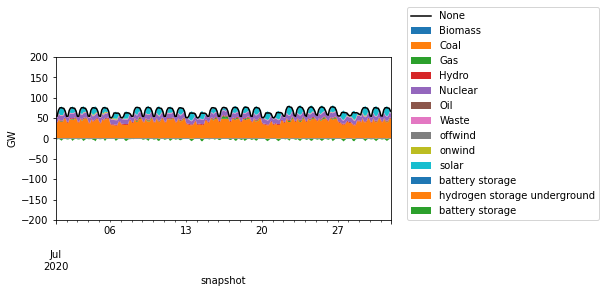

In [64]:
plot_dispatch(n_DE,time="2020-07")

In [65]:
system_cost(n_DE)

carrier
AC                              1240.155724
Biomass                            0.024046
Coal                               1.244708
Gas                                0.159767
Hydro                              0.000000
Nuclear                            0.125887
Oil                                0.004051
Waste                              0.000000
offwind                            0.000000
onwind                           294.819421
solar                           1503.764999
battery storage                  635.569973
hydrogen storage underground       0.000000
dtype: float64

<AxesSubplot:ylabel='None'>

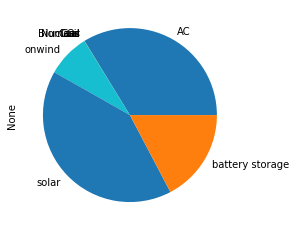

In [66]:
system_cost(n_DE).plot.pie(figsize=(4,4))

In [67]:
demand = n_DE.snapshot_weightings.generators @ n_DE.loads_t.p_set.sum(axis=1)
system_cost(n_DE).sum()*1e6 / demand.sum()

5.906856975286498

In [68]:
# save with:
n_DE.export_to_netcdf("tmp_with_co2_2020.nc");
# load with: 
# n_nc = pypsa.Network("tmp_with_co2_2020.nc")

INFO:pypsa.io:Exported network tmp_with_co2_2020.nc has links, generators, storage_units, buses, carriers, loads


In [69]:
#n_DE = pypsa.Network("tmp_with_co2_2020.nc")

<AxesSubplot:ylabel='electricity mix'>

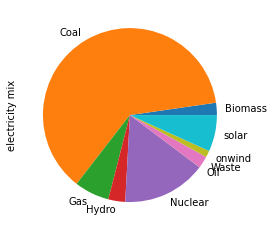

In [70]:

gen = pd.DataFrame(n_DE.generators_t.p.sum(),columns=["electricity mix"])
indexes = gen.index
new_indexes = []
for index in indexes:
    new_index = index.split("-")[1]
    #print(new_index)
    new_indexes.append(new_index)
    
gen["index"] = new_indexes
(gen.groupby("index")["electricity mix"].sum()).plot.pie(figsize=(4,4))

##### solve without co2

In [71]:
n_DE.add(
    "GlobalConstraint",
    "CO2Limit",
    carrier_attribute="co2_emissions",
    sense="<=",
    constant=0,
)

In [72]:
n_DE.lopf(solver_name = "gurobi")#,formulation="kirchhoff")

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 4.0s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Read LP format model from file C:\Users\bilwi\AppData\Local\Temp\pypsa-problem-jkbz_o2p.lp
Reading time = 2.47 seconds
obj: 597313 rows, 275272 columns, 1228370 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 597313 rows, 275272 columns and 1228370 nonzeros
Model fingerprint: 0xe0035b6f
Coefficient statistics:
  Matrix range     [1e-06, 5e+02]
  Objective range  [3e-02, 3e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 3e+04]
Presolve removed 338111 rows and 77519 columns
Presolve time: 2.31s
Presolved: 259202 rows, 197753 columns, 783462 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.10s

Barrier statistics:
 Dense cols : 39
 Free vars  : 46848
 AA' NZ     : 7.849e+05
 Factor NZ  : 3.451e+06 (roughly 200 MB of

  95   5.10976888e+10  5.10976669e+10  3.38e-06 1.26e-05  5.60e-02    47s
  96   5.10976878e+10  5.10976679e+10  3.01e-06 1.17e-05  5.07e-02    48s
  97   5.10976810e+10  5.10976706e+10  5.72e-07 9.03e-06  2.67e-02    48s
  98   5.10976809e+10  5.10976710e+10  8.66e-06 8.64e-06  2.54e-02    49s
  99   5.10976808e+10  5.10976712e+10  1.53e-05 8.46e-06  2.48e-02    49s
 100   5.10976808e+10  5.10976714e+10  2.59e-05 8.31e-06  2.43e-02    49s
 101   5.10976807e+10  5.10976714e+10  1.06e-04 8.26e-06  2.40e-02    50s
 102   5.10976805e+10  5.10976717e+10  9.23e-05 8.05e-06  2.28e-02    50s
 103   5.10976804e+10  5.10976727e+10  8.96e-05 7.02e-06  2.01e-02    51s
 104   5.10976804e+10  5.10976727e+10  9.97e-05 6.95e-06  1.98e-02    51s
 105   5.10976800e+10  5.10976734e+10  6.67e-05 6.26e-06  1.71e-02    52s
 106   5.10976798e+10  5.10976742e+10  5.69e-05 5.46e-06  1.47e-02    52s
 107   5.10976798e+10  5.10976756e+10  2.01e-04 4.87e-06  1.10e-02    53s
 108   5.10976796e+10  5.10976771e+10 

INFO:pypsa.linopf:Optimization successful. Objective value: 5.11e+10


('ok', 'optimal')

C:\Users\bilwi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1391: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(None, 0)


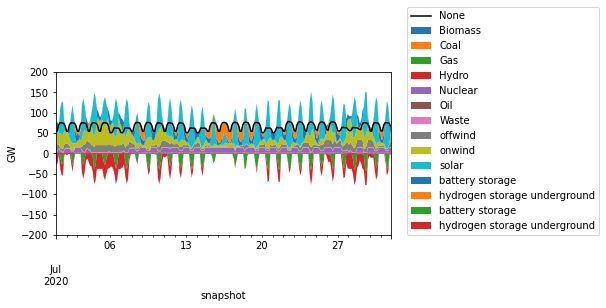

In [73]:
plot_dispatch(n_DE,time="2020-07")

In [74]:
system_cost(n_DE)

carrier
AC                               7713.804499
Biomass                             0.014459
Coal                                0.000000
Gas                                 0.000000
Hydro                               0.000000
Nuclear                             0.091146
Oil                                 0.000000
Waste                               0.000000
offwind                          4097.360955
onwind                          13771.165745
solar                            8409.714177
battery storage                  3843.096854
hydrogen storage underground    11956.604353
dtype: float64

<AxesSubplot:ylabel='None'>

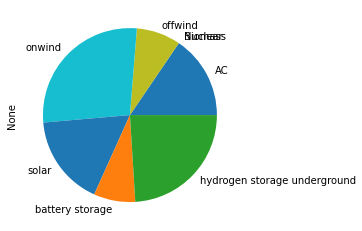

In [75]:
system_cost(n_DE).plot.pie(figsize=(4,4))

In [76]:
demand = n_DE.snapshot_weightings.generators @ n_DE.loads_t.p_set.sum(axis=1)
system_cost(n_DE).sum()*1e6 / demand.sum()

80.01193282315886

In [77]:
n_DE.export_to_netcdf("tmp_no_co2_2020.nc");
# load with: 
# n_nc = pypsa.Network("tmp_no_co2_2020.nc")

INFO:pypsa.io:Exported network tmp_no_co2_2020.nc has links, generators, storage_units, buses, carriers, global_constraints, loads


In [78]:
n_DE.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
generators_i,,,,,,,,,,,,,,,,,,,,,
Region 0-Biomass,0,Slack,,406.90,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,406.900000
Region 0-Coal,0,PQ,,11427.10,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,11427.100000
Region 0-Gas,0,PQ,,4192.65,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,4192.650000
Region 0-Hydro,0,PQ,,1182.50,False,0.0,inf,0.0,0.2636,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1182.500000
Region 0-Nuclear,0,PQ,,0.00,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.000000
Region 0-Oil,0,PQ,,1442.00,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1442.000000
Region 0-Waste,0,PQ,,371.90,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,371.900000
Region 1-Biomass,1,Slack,,858.80,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,858.800000
Region 1-Coal,1,PQ,,5942.50,False,0.0,inf,0.0,1.0000,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,5942.500000


In [79]:
n_DE = pypsa.Network("tmp_no_co2_2020.nc")

INFO:pypsa.io:Imported network tmp_no_co2_2020.nc has buses, carriers, generators, global_constraints, links, loads, storage_units


In [80]:
n_DE = pypsa.Network("tmp_no_co2_2020.nc")gen = pd.DataFrame(n_DE.generators_t.p.sum(),columns=["electricity mix"])
indexes = gen.index
new_indexes = []
for index in indexes:
    new_index = index.split("-")[1]
    #print(new_index)
    new_indexes.append(new_index)
    
gen["index"] = new_indexes
(gen.groupby("index")["electricity mix"].sum()).plot.pie(figsize=(4,4))

SyntaxError: invalid syntax (Temp/ipykernel_12408/1995034877.py, line 1)

### Sensitivity Analysis: Variations of onwind costs

(Run only once with the 2020 data + no co2)

In [ ]:

indexes=[]
for tech in n_DE.generators["capital_cost"].index:
    if "onwind" in tech:
        indexes.append(tech)
indexes

In [ ]:
#capital_cost

In [ ]:
sensitivity = {}

capital_cost = n_DE.generators.loc['Region 0-onwind', "capital_cost"] # all regions have the same capital cost for onwind

for factor in [0.00, 0.20, 0.40, 0.60, 0.80]:
    for index in indexes:
        n_DE.generators.loc[index, "capital_cost"] = capital_cost * factor   
    n_DE.lopf(solver_name='gurobi')
    sensitivity[factor] = system_cost(n_DE)
    n_DE.export_to_netcdf("tmp_no_co2_2020_"+str(factor)[2:]+".nc");

for index in indexes:
    n_DE.generators.loc[index, "capital_cost"] = capital_cost * 100   
n_DE.lopf(solver_name='gurobi')
sensitivity[1.0] = system_cost(n_DE)
n_DE.export_to_netcdf("tmp_no_co2_2020_100.nc");


In [ ]:
og_sensitivity = sensitivity.copy()

In [ ]:
#sensitivity[0.6]["offwind"], #it was -1.0032242189382224e-20
#sensitivity[0.4]["offwind"]=0 #sensitivity[0.4]["offwind"]=0 #sensitivity[0.4]["offwind"]=0 #

In [ ]:
sensitivity[0.0]["offwind"], sensitivity[0.2]["offwind"], sensitivity[0.4]["offwind"], sensitivity[0.6]["offwind"], sensitivity[0.8]["offwind"], sensitivity[1.0]["offwind"],  

In [ ]:
n_DE.carriers.color

In [ ]:
df = pd.DataFrame(sensitivity).T.div(1e3) # billion Euro/a
df

In [ ]:
n_DE.carriers.color["hydrogen storage underground"]="#330066"
n_DE.carriers.color["battery storage"]="#4d004d"
n_DE.carriers.color


In [ ]:
#colors = ["blue","green","purple","lightblue","seagreen","red","orange","yellow","teal"]
colors = ["royalblue", "springgreen", "teal", "Green", "Blue", "Purple", "Pink", "Brown", "Grey", "Black", "Cyan", "darkblue", "Yellow"]

In [ ]:
df.plot.area(
    stacked=True,
    linewidth=0.01,
    #color=df.columns.map(n_DE.carriers.color),
    color=colors,
    figsize=(7,7),
    xlim=(0,1),
    xlabel="Onwind Factor",
    ylabel="System cost [bn€/a]",
    ylim=(0,100),
)

In [ ]:
gen = pd.DataFrame(n_DE.generators_t.p.sum(),columns=["electricity mix"])
indexes = gen.index
new_indexes = []
for index in indexes:
    new_index = index.split("-")[1]
    #print(new_index)
    new_indexes.append(new_index)
    
gen["index"] = new_indexes
(gen.groupby("index")["electricity mix"].sum()).plot.pie(figsize=(4,4))

In [ ]:
solar_timeseries

#### plotting input data

In [ ]:
solar_timeseriesf =solar_timeseries[solar_timeseries.index.month == 2]

off = off_shore_timeseries [[5]]
offf = off[off.index.month == 2]

on_wind_timeseriesf = on_wind_timeseries[on_wind_timeseries.index.month == 2]

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
on_wind_timeseriesf.plot(ax=ax,color=['blue', 'red', 'green', 'yellow', 'purple'],linewidth=2)
offf.plot(ax=ax,color='black',linewidth=3)
solar_timeseriesf.plot(ax=ax,color=['blue', 'red', 'green', 'yellow', 'purple'],linewidth=2)
plt.ylabel('Capacity factors')
plt.xlabel('Time')
plt.title("capacity factors february 2020")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
powerplants = pd.read_csv('global_power_plant_database.csv',low_memory=False)
geometry = gpd.points_from_xy(powerplants['longitude'], powerplants['latitude'])

powerplants = gpd.GeoDataFrame(powerplants, geometry=geometry, crs=4326)#.loc[[powerplants.country=="DEU"]]
powerplants = powerplants.loc[powerplants["country"]=="DEU"]
powerplants = powerplants.loc[powerplants["primary_fuel"]!="Other"]
powerplants = powerplants.loc[powerplants["primary_fuel"]!="Solar"]
powerplants = powerplants.loc[powerplants["primary_fuel"]!="Wind"]

powerplants = powerplants.sjoin(group_regions[["geometry"]], predicate='intersects')
powerplants = powerplants.groupby(["index_right","primary_fuel"]).capacity_mw.sum()
powerplants


powerplants = powerplants.unstack()
powerplantsgw = powerplants/1000

powerplantsgw.plot.bar(figsize=(20,10))
plt.ylabel('GW')
plt.xlabel('Region')
plt.title("Power plant capacities 2020")

In [ ]:
load = pd.read_csv("load.csv")
loadde = load[['time','DE']].copy()
loadde['0'] = loadde['DE']*0.16866
loadde['1'] = loadde['DE']*0.291957
loadde['2'] = loadde['DE']*0.27648
loadde['3'] = loadde['DE']*0.100963
loadde['4'] = loadde['DE']*0.16194
loadde.head()
loadde.time = pd.to_datetime(loadde.time)  
loaddef = loadde[loadde['time'].dt.month == 2]

x = loaddef.time
A = loaddef['0']/1000
B = loaddef['1']/1000
C = loaddef['2']/1000
D = loaddef['3']/1000
E = loaddef['4']/1000

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(x, A, linewidth=3, label='Region 0')
ax.plot(x, B, linewidth=3, label='Region 1')
ax.plot(x, C, linewidth=3, label='Region 2')
ax.plot(x, D, linewidth=3, label='Region 3')
ax.plot(x, E, linewidth=3, label='Region 4')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('GW')
plt.xlabel('Time')
plt.title("Electricity load february 2013")




In [ ]:
#can_DE.plot()